## Analysis of Uber Data: Location-Based Insights

In this section, we perform an in-depth analysis of the `START` and `STOP` columns, which represent the starting and stopping locations of trips, respectively. The analysis aims to understand the distribution and patterns of trips by examining other attributes, such as trip duration, miles traveled, and purpose of the trip.

### 1. Data Preprocessing
- **Converting Date Columns**: The `START_DATE` and `END_DATE` columns are converted into datetime format using the `pd.to_datetime()` function to ensure consistency in date-time processing.
- **Handling Missing Values**: Rows with invalid or missing date values are dropped using `dropna()`, ensuring that only valid trips are considered for analysis.
- **Calculating Trip Duration**: The trip duration in minutes is calculated by subtracting the `START_DATE` from the `END_DATE` and converting the result from seconds to minutes. This new column, `DURATION`, represents how long each trip took.

### 2. Common Routes Analysis
- **Grouping Data by Locations**: The data is grouped by both `START` and `STOP` locations to identify common routes. For each route, we calculate:
  - The number of trips (`count` of trips)
  - The average miles traveled (`mean` of `MILES`)
  - The average duration (`mean` of `DURATION`)
  - The most common trip purpose (`mode` of `PURPOSE`), which identifies the most frequent reason for taking the route
- **Sorting and Aggregation**: The routes are sorted based on the number of trips (`MILES` count), allowing us to focus on the most common routes.

### 3. Resetting the Index
- After performing the aggregation, the `MultiIndex` resulting from the group-by operation is flattened using `reset_index()`. This step ensures that the data is easier to work with and more accessible for visualization.

### 4. Summary Statistics
- **Average Miles and Duration**: We print summary statistics (count, mean, standard deviation, min, and max) for both the `Avg_Miles` and `Avg_Duration` columns to understand the distribution and variability in the data.

### 5. Visualizing the Distribution of Key Variables
To better understand the data, we use a combination of histograms and bar plots:

- **Distribution of Average Miles**:
  - A histogram with a Kernel Density Estimate (KDE) overlay is created to visualize the distribution of the average miles for each route. The `Avg_Miles` column is used for this plot, and the x-axis represents the average miles, while the y-axis represents the frequency of trips.

- **Distribution of Average Duration**:
  - Another histogram with KDE is plotted to examine the distribution of trip durations (`Avg_Duration`). This plot helps us identify the most common trip durations and understand the variation in trip lengths.

### 6. Top 10 Routes by Average Miles
- We use a bar plot to visualize the top 10 routes with the highest average miles traveled. The `Avg_Miles` column is used to rank the routes, and the `START` and `STOP` locations are shown as labels for each route.

### 7. Most Common Purposes for Routes
- A bar plot is created to show the distribution of the most common purposes for trips. The `Most_Common_Purpose` column is used, and the plot highlights the frequency of each purpose across the most frequent routes.

### 8. Analyzing Start and Stop Locations
- **Top 10 Start Locations**: A bar plot is generated to visualize the top 10 start locations by the number of trips originating from each location. The `START` column is used to count occurrences, and the results are visualized in a horizontal bar chart.
- **Top 10 Stop Locations**: Similarly, the top 10 stop locations are plotted based on the number of trips ending at each location. The `STOP` column is used for this analysis, and the result is presented in a bar chart.

### 9. Plot Customizations
For all plots, the following customizations are applied:
- Titles are added with custom font sizes and bold styling for better readability.
- Axis labels are also customized to reflect the nature of the data being presented.
- The font size of tick labels is adjusted for improved visibility.
- Grid lines are added to enhance readability, especially for bar plots and histograms.
- The layout is adjusted using `plt.tight_layout()` to ensure that all elements are well-spaced and visible.

### Conclusion
This analysis provides a comprehensive view of the trip data, focusing on start and stop locations while considering other variables like trip duration, distance, and purpose. The visualizations help to reveal patterns and trends in trip behavior, providing valuable insights for decision-making or further analysis.

In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns  # For creating statistical visualizations

# Read the CSV file into a pandas DataFrame
uber_data = pd.read_csv('UberDataset.csv')  # Load the dataset from the provided file

# Convert the 'START_DATE' column to datetime format
# The 'errors="coerce"' argument will replace invalid parsing with NaT (Not a Time)
uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'], errors='coerce')

# Convert the 'END_DATE' column to datetime format
# This ensures consistency in date-time processing for further analysis
uber_data['END_DATE'] = pd.to_datetime(uber_data['END_DATE'], errors='coerce')

# Drop rows with invalid dates
uber_data = uber_data.dropna(subset=['START_DATE', 'END_DATE'])

# Calculate the trip duration in minutes by subtracting the START_DATE from the END_DATE
# Convert the result from seconds to minutes
uber_data['DURATION'] = (uber_data['END_DATE'] - uber_data['START_DATE']).dt.total_seconds() / 60

In [2]:
# Display the first 5 rows of the dataset to get an overview of its structure and content
uber_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


In [3]:
# Analyze common routes by grouping the data based on 'START' and 'STOP' locations
routes = uber_data.groupby(['START', 'STOP']).agg({
    'MILES': ['count', 'mean'],  # Count the number of trips and calculate the average miles
    'DURATION': 'mean',  # Calculate the average duration of trips
    'PURPOSE': lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown'  # Identify the most common purpose for each route
}).sort_values(('MILES', 'count'), ascending=False)  # Sort routes by the number of trips in descending order

# Flatten multi-level column names for easier access
routes.columns = ['Trip_Count', 'Avg_Miles', 'Avg_Duration', 'Most_Common_Purpose']

# Display the top 10 most common routes based on trip count
print("Most Common Routes (Top 10):")
routes.head(10)

Most Common Routes (Top 10):


Trip_Count  Avg_Miles  Avg_Duration  \
START            STOP                                                    
Morrisville      Cary                      36   5.038889     14.416667   
Cary             Morrisville               34   5.705882     16.352941   
                 Cary                      23   4.534783     14.826087   
                 Durham                    19  10.689474     19.894737   
Durham           Cary                      17  10.088235     20.588235   
Unknown Location Unknown Location          14  14.700000     18.642857   
Cary             Raleigh                    9  13.400000     27.666667   
Raleigh          Cary                       8  14.625000     31.500000   
Westpark Place   Whitebridge                8   2.175000      8.125000   
Apex             Cary                       7   6.042857     17.285714   

                                  Most_Common_Purpose  
START            STOP                                  
Morrisville      Cary                  Customer Visit  
Cary             Morrisville           Meal/Entertain  
                 Cary                 Errand/Supplies  
                 Durham                       Meeting  
Durham           Cary                         Meeting  
Unknown Location Unknown Location      Temporary Site  
Cary             Raleigh               Customer Visit  
Raleigh          Cary                         Meeting  
Westpark Place   Whitebridge          Errand/Supplies  
Apex             Cary                  Customer Visit

In [4]:
# Reset the index of the 'routes' dataframe to resolve MultiIndex issues
# This is necessary after performing aggregation to convert the multi-level index into columns for easier access
routes = routes.reset_index()

# Display the first few rows of the dataframe to verify the changes
routes.head()

,START,STOP,Trip_Count,Avg_Miles,Avg_Duration,Most_Common_Purpose
0,Morrisville,Cary,36,5.038889,14.416667,Customer Visit
1,Cary,Morrisville,34,5.705882,16.352941,Meal/Entertain
2,Cary,Cary,23,4.534783,14.826087,Errand/Supplies
3,Cary,Durham,19,10.689474,19.894737,Meeting
4,Durham,Cary,17,10.088235,20.588235,Meeting


In [5]:
# Print summary statistics for the routes dataframe

# Printing the section header for the summary statistics
print("\nSummary Statistics:")

# Printing the section header for average miles statistics
print("\nAverage Miles Statistics:")

# Displaying the summary statistics (e.g., count, mean, std, min, max) for the 'Avg_Miles' column
print(routes['Avg_Miles'].describe())

# Printing the section header for average duration statistics
print("\nAverage Duration Statistics:")

# Displaying the summary statistics (e.g., count, mean, std, min, max) for the 'Avg_Duration' column
print(routes['Avg_Duration'].describe())


Summary Statistics:

Average Miles Statistics:
count    184.000000
mean      11.104031
std       22.656716
min        0.500000
25%        2.160417
50%        5.019444
75%       10.825000
max      174.200000
Name: Avg_Miles, dtype: float64

Average Duration Statistics:
count    184.000000
mean      21.495374
std       23.969284
min        0.000000
25%        9.900000
50%       15.000000
75%       23.250000
max      178.000000
Name: Avg_Duration, dtype: float64


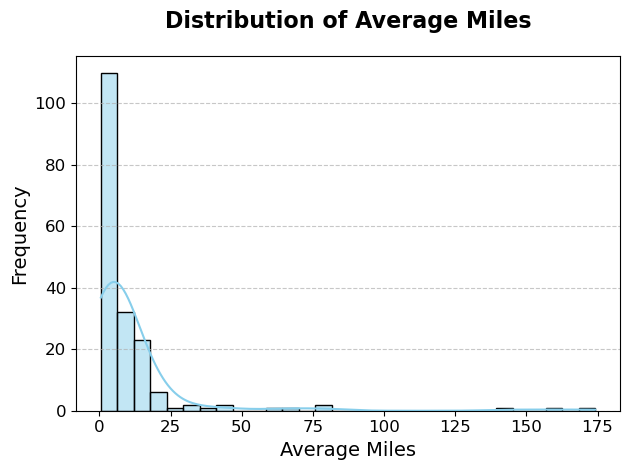

In [6]:
# Create a histogram with a KDE (Kernel Density Estimate) to visualize the distribution of 'Avg_Miles'
sns.histplot(data=routes, x='Avg_Miles', bins=30, kde=True, color='skyblue', edgecolor='black')

# Set plot title with a custom font size, bold style, and padding for better readability
plt.title('Distribution of Average Miles', fontsize=16, fontweight='bold', pad=20)

# Set x-axis label with custom font size
plt.xlabel('Average Miles', fontsize=14)

# Set y-axis label with custom font size
plt.ylabel('Frequency', fontsize=14)

# Adjust tick labels' font size for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines on the y-axis to make the plot more readable and enhance visual clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing and ensure all elements are displayed clearly
plt.tight_layout()

# Display the plot
plt.show()

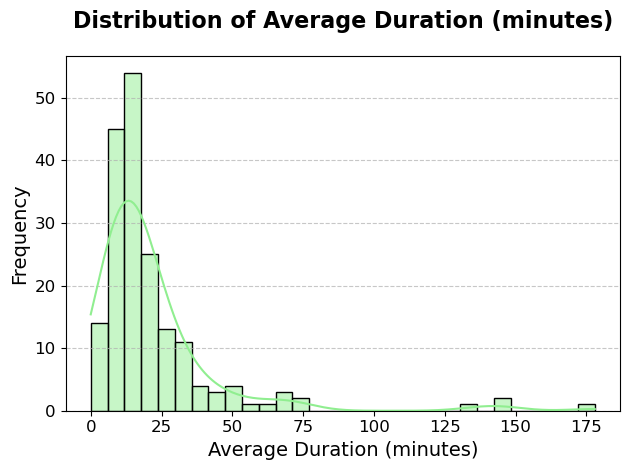

In [7]:
# Create a histogram with a KDE (Kernel Density Estimate) to visualize the distribution of 'Avg_Duration'
sns.histplot(data=routes, x='Avg_Duration', bins=30, kde=True, color='lightgreen', edgecolor='black')

# Set plot title with a custom font size, bold style, and padding for better readability
plt.title('Distribution of Average Duration (minutes)', fontsize=16, fontweight='bold', pad=20)

# Set x-axis label with custom font size
plt.xlabel('Average Duration (minutes)', fontsize=14)

# Set y-axis label with custom font size
plt.ylabel('Frequency', fontsize=14)

# Adjust tick labels' font size for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines on the y-axis to make the plot more readable and enhance visual clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing and ensure all elements are displayed clearly
plt.tight_layout()

# Display the plot
plt.show()

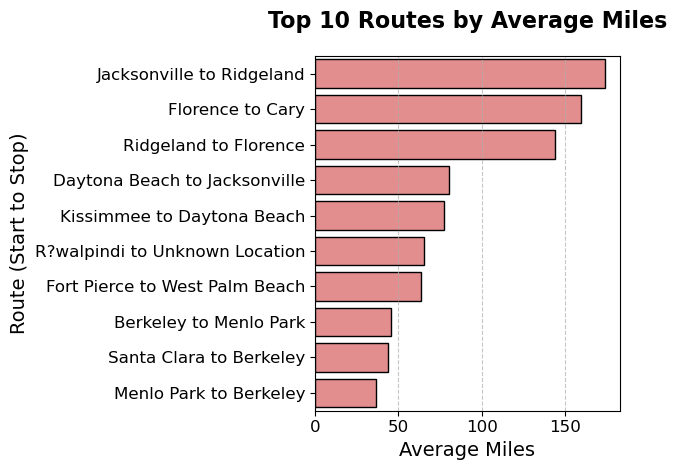

In [8]:
# Create a bar plot to visualize the top 10 routes by average miles
top_miles = routes.nlargest(10, 'Avg_Miles')  # Select the top 10 routes with the highest average miles
sns.barplot(data=top_miles, x='Avg_Miles', y=top_miles['START'] + ' to ' + top_miles['STOP'], color='lightcoral', edgecolor='black')

# Set plot title with a custom font size, bold style, and padding for better readability
plt.title('Top 10 Routes by Average Miles', fontsize=16, fontweight='bold', pad=20)

# Set x-axis label with custom font size
plt.xlabel('Average Miles', fontsize=14)

# Set y-axis label with custom font size to indicate the route (start to stop)
plt.ylabel('Route (Start to Stop)', fontsize=14)

# Adjust tick labels' font size for better readability on both axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines on the x-axis to make the chart more readable and enhance visual clarity
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout for better spacing and ensure all elements are displayed clearly
plt.tight_layout()

# Display the plot
plt.show()

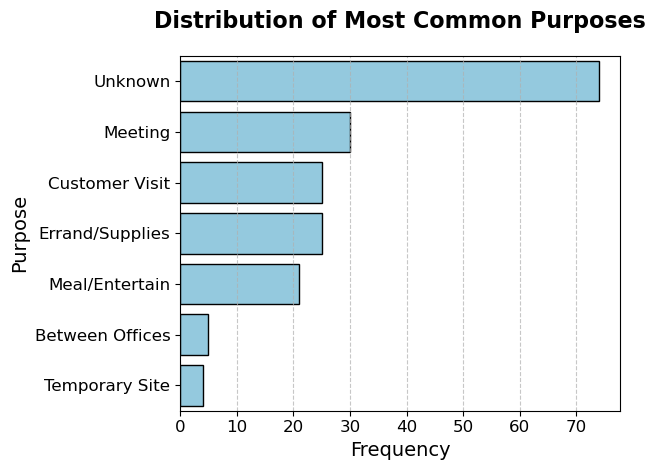

In [9]:
# Count the frequency of each unique 'Most_Common_Purpose' in the dataset
purpose_counts = routes['Most_Common_Purpose'].value_counts()

# Create a bar plot to visualize the distribution of most common purposes
# Customize the color to 'skyblue' and add black edges around the bars for better contrast
sns.barplot(x=purpose_counts.values, y=purpose_counts.index, color='skyblue', edgecolor='black')

# Set the plot title with custom font size, bold style, and padding for improved visual appeal
plt.title('Distribution of Most Common Purposes', fontsize=16, fontweight='bold', pad=20)

# Set the x-axis label with custom font size to indicate frequency
plt.xlabel('Frequency', fontsize=14)

# Set the y-axis label with custom font size to indicate the purpose
plt.ylabel('Purpose', fontsize=14)

# Adjust the font size of tick labels on both axes for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines along the x-axis for improved readability and clarity
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout to ensure no elements overlap and everything fits well within the figure
plt.tight_layout()

# Display the plot
plt.show()

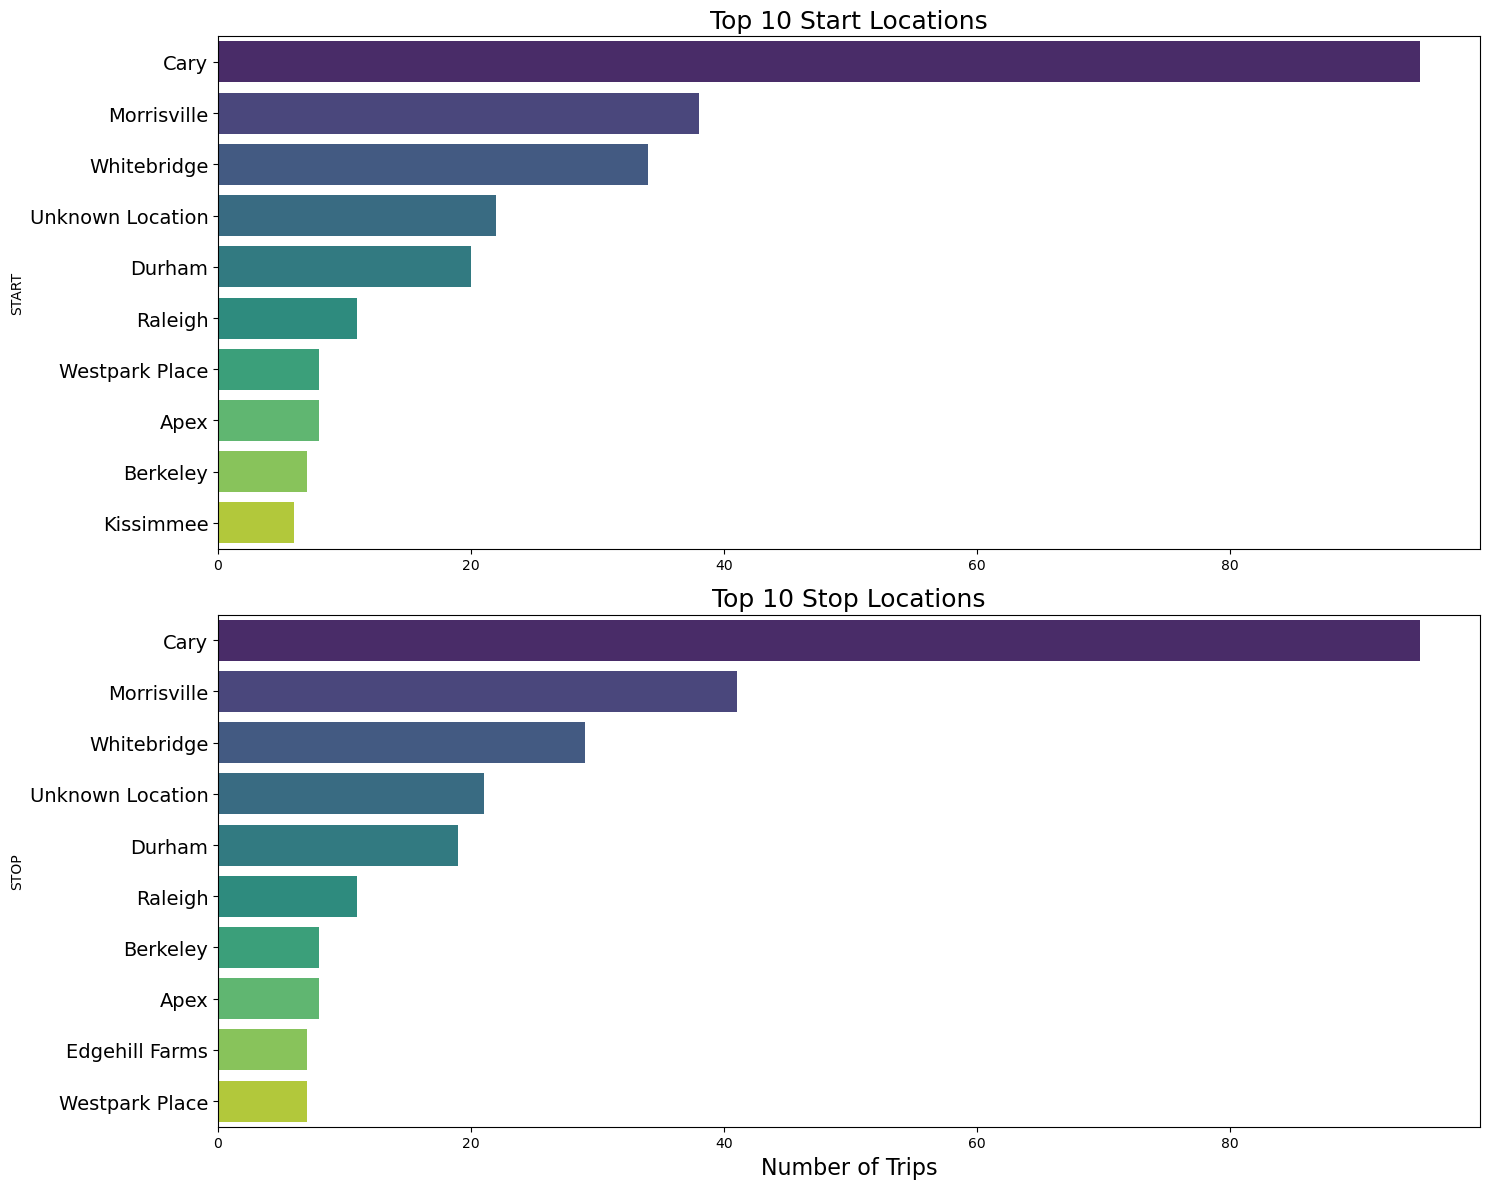

In [10]:
# Create a figure with two subplots arranged vertically (2 rows, 1 column)
# The figure size is set to 15 by 12 for better readability
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Calculate the top 10 start locations by counting the number of occurrences in the 'START' column
start_counts = uber_data['START'].value_counts().head(10)

# Create a bar plot for the top 10 start locations
# 'viridis' palette is used for coloring, 'hue' is set to 'start_counts.index' for consistent coloring,
# and 'legend=False' removes the legend for clarity
sns.barplot(x=start_counts.values, y=start_counts.index, palette='viridis', hue=start_counts.index, ax=ax1, legend=False)

# Set the title for the first plot to 'Top 10 Start Locations'
ax1.set_title('Top 10 Start Locations', fontsize=18)

# Increase font size for y-axis values
ax1.tick_params(axis='y', labelsize=14)  # Increased font size for y-axis labels

# Calculate the top 10 stop locations by counting the number of occurrences in the 'STOP' column
stop_counts = uber_data['STOP'].value_counts().head(10)

# Create a bar plot for the top 10 stop locations
# 'viridis' palette is used for coloring, 'hue' is set to 'stop_counts.index' for consistent coloring,
# and 'legend=False' removes the legend for clarity
sns.barplot(x=stop_counts.values, y=stop_counts.index, palette='viridis', hue=stop_counts.index, ax=ax2, legend=False)

# Set the title for the second plot to 'Top 10 Stop Locations'
ax2.set_title('Top 10 Stop Locations', fontsize=18)

# Set the x-axis label to 'Number of Trips'
ax2.set_xlabel('Number of Trips', fontsize=16)

# Increase font size for y-axis values
ax2.tick_params(axis='y', labelsize=14)  # Increased font size for y-axis labels

# Adjust layout to ensure that the plots fit nicely without overlapping
plt.tight_layout()

# Display the plots
plt.show()